In [1]:
import pandas as pd
import numpy as np

In [2]:
comments=pd.read_csv("C://Users//vikas.srikanth//Youtube/Home Decor//Comments//homeDecor_comments.csv")

In [3]:
comments.head

<bound method NDFrame.head of         Unnamed: 0                                        commentText  \
0                0  Hi Guys Thanks For your supports please watch ...   
1                1                                                NaN   
2                2                                                NaN   
3                3                                                NaN   
4                4                                                NaN   
5                5                                                NaN   
6                6                                                NaN   
7                7                                                NaN   
8                8  Approximately how heavy a weight would it bear...   
9                9                                          Very slow   
10              10                                   Bkwas kyuki time   
11              11                                So nice to decorate   
12              12   

In [4]:
#commentTe
#replies.commentText

df['content'] = df['content'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

NameError: name 'df' is not defined

In [5]:
comments=comments.fillna("")

In [6]:
len(comments)

116710

In [8]:
import nltk
nltk.download("words")
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\vikas.srikanth\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [9]:
# function to remove stopwords

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#comments['commentText'] = comments[comments['commentText'].notnull()]
stop_eng = stopwords.words('english')

#customstopwords =["amzn","http", "https", "with", "this", "that"]

comments['commentText']=comments['commentText'].str.replace("[^a-zA-Z#]", " ")
comments['replies.commentText']=comments['replies.commentText'].str.replace("[^a-zA-Z#]", " ")
customstopwords =["amzn","http", "https", "with", "this", "that","most","best","youtube","good","like","share","comment","thank",
                     "you","god","youtu","comments","subscribe","think","boy","girl","video","best","review","please","dislike","know","come","uncle",
                     "aunt","aunty","mean","bdgaqts","want","thing","unbox","original","nephew","tell","telling", "channel","sara","many",
                     "word","birthday","friend","good", " ", "nice", "also", "title", "description", "would", "will", "find", "found", "went", "wish",
                     "people","name","something","some", "thing","well","sure","much","time","para","little","love","whole","input","great","stuff",
                     "funny","content","well","hope","someone","something","somewhere","muchhhhh", "hard","lease","matter","helpful","fine","week", "different"]
def remove_stopwords(rev):
    customstopwords =["amzn","http", "https", "with", "this", "that","most","best","youtube","good","like","share","comment","thank",
                     "you","god","youtu","comments","subscribe","think","boy","girl","video","best","review","please","dislike","know","come","uncle",
                     "aunt","aunty","mean","bdgaqts","want","thing","unbox","original","nephew","tell","telling", "channel","sara","many",
                     "word","birthday","friend","good", "nice", "also", "title", "description", "would", "will", "find", "found", "went", "wish",
                     "people","name","something","some", "thing","well","sure","much","time","para","little","love","whole","input","great","stuff",
                     "funny","content","well","hope","someone","something","somewhere","muchhhhh", "hard","lease","matter","helpful","fine","week", "different"]
    rev_new = " ".join([i for i in nltk.wordpunct_tokenize(str(rev)) if i not in stop_eng and i not in customstopwords and i in words])
    #rev_new = " ".join([i for i in rev if i not in stop_eng and not i in customstopwords and ])
    
    return rev_new

# remove short words (length < 3)
comments['commentText'] = comments['commentText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
comments['replies.commentText']=comments['replies.commentText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in comments['commentText']]+[remove_stopwords(r.split()) for r in comments['replies.commentText']]
# make entire text lowercase
reviews = [r.lower() for r in reviews]
print(reviews)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vikas.srikanth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['watch project', '', '', '', '', '', '', '', 'heavy weight bear easily idea', 'slow', '', 'decorate', 'size cardboard', 'could material wood stability idea cardboard perfect room anything overly heavy perfect', 'load rakh idea', '', '', 'nice', 'forever', 'might slow', 'nice bast world', 'slow fast', 'nice', '', 'size board', 'size board', 'really slow', '', 'glue', '', 'wall long', 'wondering sealed wall', 'size cardboard', 'make small bedroom', 'slow showing step step', 'nice', 'glue stick', 'cool', '', 'speed', 'wonderful work', 'slow', '', 'corner', 'adjustable usable shelf stick anywhere versatile shelf discovery term shelf', '', '', 'fast', 'choice glue replay', 'awesome idea', 'nice', 'nice', '', '', 'slow', '', '', '', 'make home', 'speed', 'idea painstakingly idea', '', 'instead glue', 'toot insulting movement', 'jayesh', 'nice', 'bara lata', 'work', 'waste', 'watch', 'slow glue paste card board faster easily', '', '', 'beautiful creativity', '', '', '', 'slow', 'nice', '', '

In [25]:
len(reviews)

233420

In [26]:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
        doc=nlp(sent)
        #output.append([sent.split()])
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
             #doc = nlp(sent.split())
             #output.append([nlp(sent.split())])
             #output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [27]:
reviews_2 = lemmatization(reviews)
print(reviews_2)

[['project'], [], [], [], [], [], [], [], ['heavy', 'weight', 'bear', 'idea'], ['slow'], [], [], ['size', 'cardboard'], ['wood', 'stability', 'idea', 'cardboard', 'perfect', 'room', 'anything', 'heavy', 'perfect'], ['load', 'rakh', 'idea'], [], [], ['nice'], [], [], ['nice', 'bast', 'world'], [], ['nice'], [], ['size', 'board'], ['size', 'board'], ['slow'], [], ['glue'], [], ['wall'], ['wall'], ['size', 'cardboard'], ['small', 'bedroom'], ['slow', 'step', 'step'], ['nice'], ['glue', 'stick'], ['cool'], [], ['speed'], ['wonderful', 'work'], ['slow'], [], ['corner'], ['adjustable', 'usable', 'shelf', 'stick', 'versatile', 'shelf', 'discovery', 'term', 'shelf'], [], [], [], ['choice', 'glue', 'replay'], ['awesome', 'idea'], ['nice'], ['nice'], [], [], ['slow'], [], [], [], [], ['speed'], ['idea'], [], ['glue'], ['toot', 'movement'], [], ['nice'], ['bara', 'lata'], ['work'], ['waste'], [], ['slow', 'glue', 'paste', 'card', 'board'], [], [], ['beautiful', 'creativity'], [], [], [], ['slow']

In [28]:
reviews_2

[['project'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['heavy', 'weight', 'bear', 'idea'],
 ['slow'],
 [],
 [],
 ['size', 'cardboard'],
 ['wood',
  'stability',
  'idea',
  'cardboard',
  'perfect',
  'room',
  'anything',
  'heavy',
  'perfect'],
 ['load', 'rakh', 'idea'],
 [],
 [],
 ['nice'],
 [],
 [],
 ['nice', 'bast', 'world'],
 [],
 ['nice'],
 [],
 ['size', 'board'],
 ['size', 'board'],
 ['slow'],
 [],
 ['glue'],
 [],
 ['wall'],
 ['wall'],
 ['size', 'cardboard'],
 ['small', 'bedroom'],
 ['slow', 'step', 'step'],
 ['nice'],
 ['glue', 'stick'],
 ['cool'],
 [],
 ['speed'],
 ['wonderful', 'work'],
 ['slow'],
 [],
 ['corner'],
 ['adjustable',
  'usable',
  'shelf',
  'stick',
  'versatile',
  'shelf',
  'discovery',
  'term',
  'shelf'],
 [],
 [],
 [],
 ['choice', 'glue', 'replay'],
 ['awesome', 'idea'],
 ['nice'],
 ['nice'],
 [],
 [],
 ['slow'],
 [],
 [],
 [],
 [],
 ['speed'],
 ['idea'],
 [],
 ['glue'],
 ['toot', 'movement'],
 [],
 ['nice'],
 ['bara', 'lata'],
 ['work'],
 ['waste'],
 [],


In [29]:
from gensim import corpora

dictionary = corpora.Dictionary(reviews_2)
corpus = [dictionary.doc2bow(text) for text in reviews_2]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [31]:
import gensim
NUM_TOPICS = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=25)
ldamodel.save('model0.gensim')

In [32]:

topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.067*"year" + 0.065*"nice" + 0.044*"trend" + 0.034*"last"')
(1, '0.081*"glad" + 0.041*"kitchen" + 0.035*"everyone" + 0.035*"dear"')
(2, '0.060*"light" + 0.052*"work" + 0.039*"true" + 0.037*"watching"')
(3, '0.134*"color" + 0.110*"room" + 0.034*"everything" + 0.034*"lovely"')
(4, '0.102*"happy" + 0.076*"idea" + 0.063*"design" + 0.046*"cool"')
(5, '0.076*"thank" + 0.048*"style" + 0.046*"wall" + 0.028*"dark"')
(6, '0.065*"paint" + 0.052*"white" + 0.040*"life" + 0.038*"sara"')
(7, '0.065*"beautiful" + 0.036*"paper" + 0.032*"maker" + 0.031*"round"')
(8, '0.060*"house" + 0.046*"minute" + 0.039*"right" + 0.036*"awesome"')
(9, '0.075*"space" + 0.058*"home" + 0.035*"small" + 0.024*"course"')


In [33]:
from wordcloud import *

In [34]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\ProgramData\Anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """
C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [35]:
import matplotlib
colors=[]
for name, hex in matplotlib.colors.cnames.items():
    colors.append(name)

In [36]:
from collections import Counter 
  
def remov_duplicates(string): 
  
    # split input string separated by space 
    string = string.split(" ") 
  
    # joins two adjacent elements in iterable way 
    for i in range(0, len(string)): 
        string[i] = "".join(string[i]) 
  
    # now create dictionary using counter method 
    # which will have strings as key and their  
    # frequencies as value 
    UniqW = Counter(string) 
  
    # joins two adjacent elements in iterable way 
    s = " ".join(UniqW.keys()) 
    return s

In [60]:
#wordcloud = WordCloud(stopwords=stop_eng, background_color="white").generate(reviews)


customstopwords =["amzn","http", "https", "with", "this", "that","most","best","good","like","share","comment","thank",
                     "you","god","youtu","comments","subscribe","think","boy","girl","video","best","review","please","dislike","know","come","uncle",
                     "aunt","aunty","mean","bdgaqts","want","thing","unbox","original","nephew","tell","telling", "channel","sara","many",
                     "word","birthday","friend","good", "nice", "also", "title", "description", "would", "will", "find", "found", "went", "wish",
                     "people","name","something","some", "thing","well","sure","much","time","para","little","love","whole","input","great","stuff",
                     "funny","content","well","hope","someone","something","somewhere","muchhhhh", "hard","lease","matter","helpful","fine","week", "different",
                     "anyway", "stick","sticker","size","work","short","teen","beside","forward", "morning", "ground", "tapa", "chao","scissor", "remain",
                     "night","amazing", "never"," anyone","anywhere", "really","look","every","done","said","even","thanks","alway","dont","could","agree","cool","going","make","watching"]

unique_string=(" ").join(reviews)
#rev_new = " ".join([i for i in nltk.wordpunct_tokenize(str(unique_string)) if i not in customstopwords and i not in stop_eng])# and i in words and i if i.isalpha()])
#abc=remov_duplicates(rev_new)
rev_new = " ".join([i for i in nltk.wordpunct_tokenize(str(unique_string)) if i in colors])
abc=remov_duplicates(rev_new)
wordcloud = WordCloud(width = 1000, height = 500, background_color='white',stopwords=customstopwords, max_words=60, min_font_size=20).generate(abc)


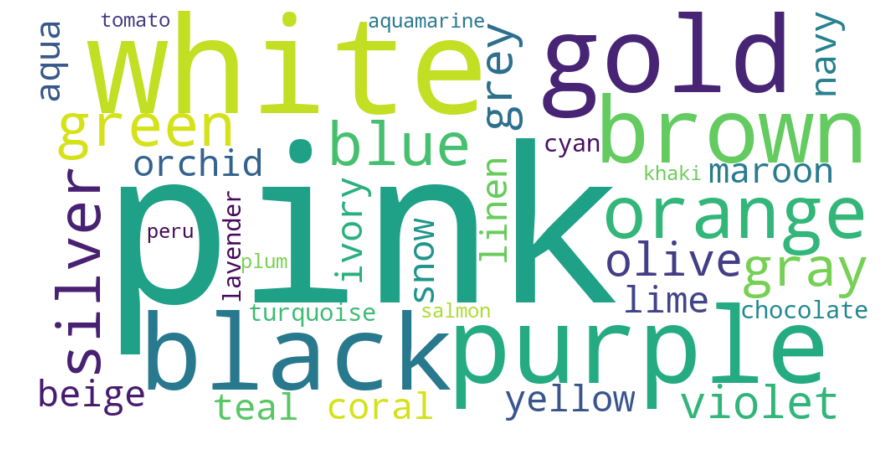

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.imshow(wordcloud, interpolation="bilinear")
#plt.close()
#print(type(unique_string))

In [230]:

#abc=remov_duplicates(rev_new)
#print(abc)